## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.570291 -0.298591 -1.366034 -0.759472 -0.981690 -0.834572
1  1.524838  1.048815  0.585879 -0.343742  1.416663  0.918809
2  0.142428 -1.417424 -0.020337 -1.145834  0.133845 -1.843678
3  0.084786 -1.544369 -1.548721 -1.332767  1.445673 -0.848531
4 -0.798648  0.725892 -1.624682 -1.514468  0.173747 -0.460499


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9534998	total: 57.5ms	remaining: 57.4s
1:	learn: 0.9452827	total: 58ms	remaining: 28.9s
2:	learn: 0.9369798	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9283406	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9203488	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9121615	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9044057	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8966413	total: 61.2ms	remaining: 7.58s
8:	learn: 0.8895873	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8822131	total: 62ms	remaining: 6.14s
10:	learn: 0.8746338	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8660651	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8573676	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8509668	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8444522	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8376521	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8305022	total: 66ms	remaining: 3.81s
17:	learn: 0.8234683	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8151098	total: 66.9ms	remaining: 3.45s

106:	learn: 0.4149897	total: 106ms	remaining: 886ms
107:	learn: 0.4123644	total: 107ms	remaining: 881ms
108:	learn: 0.4094514	total: 107ms	remaining: 876ms
109:	learn: 0.4061039	total: 108ms	remaining: 871ms
110:	learn: 0.4033231	total: 108ms	remaining: 865ms
111:	learn: 0.4007985	total: 108ms	remaining: 860ms
112:	learn: 0.3979066	total: 109ms	remaining: 854ms
113:	learn: 0.3956876	total: 109ms	remaining: 850ms
114:	learn: 0.3926779	total: 110ms	remaining: 845ms
115:	learn: 0.3895285	total: 110ms	remaining: 841ms
116:	learn: 0.3866404	total: 111ms	remaining: 836ms
117:	learn: 0.3838490	total: 111ms	remaining: 832ms
118:	learn: 0.3820708	total: 112ms	remaining: 827ms
119:	learn: 0.3799359	total: 112ms	remaining: 823ms
120:	learn: 0.3769074	total: 113ms	remaining: 818ms
121:	learn: 0.3743809	total: 113ms	remaining: 814ms
122:	learn: 0.3719806	total: 114ms	remaining: 809ms
123:	learn: 0.3690368	total: 114ms	remaining: 805ms
124:	learn: 0.3662532	total: 114ms	remaining: 800ms
125:	learn: 

279:	learn: 0.1298885	total: 186ms	remaining: 479ms
280:	learn: 0.1290392	total: 187ms	remaining: 478ms
281:	learn: 0.1282412	total: 188ms	remaining: 477ms
282:	learn: 0.1272936	total: 188ms	remaining: 476ms
283:	learn: 0.1262814	total: 189ms	remaining: 475ms
284:	learn: 0.1253904	total: 189ms	remaining: 474ms
285:	learn: 0.1245485	total: 189ms	remaining: 473ms
286:	learn: 0.1238641	total: 190ms	remaining: 472ms
287:	learn: 0.1231354	total: 190ms	remaining: 471ms
288:	learn: 0.1221764	total: 191ms	remaining: 469ms
289:	learn: 0.1213015	total: 191ms	remaining: 468ms
290:	learn: 0.1205959	total: 192ms	remaining: 467ms
291:	learn: 0.1198566	total: 192ms	remaining: 467ms
292:	learn: 0.1187717	total: 193ms	remaining: 465ms
293:	learn: 0.1178543	total: 193ms	remaining: 465ms
294:	learn: 0.1171348	total: 194ms	remaining: 464ms
295:	learn: 0.1162284	total: 195ms	remaining: 463ms
296:	learn: 0.1153837	total: 195ms	remaining: 462ms
297:	learn: 0.1145325	total: 196ms	remaining: 461ms
298:	learn: 

494:	learn: 0.0347826	total: 290ms	remaining: 296ms
495:	learn: 0.0345355	total: 291ms	remaining: 295ms
496:	learn: 0.0344229	total: 291ms	remaining: 295ms
497:	learn: 0.0343057	total: 291ms	remaining: 294ms
498:	learn: 0.0341204	total: 292ms	remaining: 293ms
499:	learn: 0.0339559	total: 293ms	remaining: 293ms
500:	learn: 0.0337738	total: 293ms	remaining: 292ms
501:	learn: 0.0335933	total: 294ms	remaining: 291ms
502:	learn: 0.0334307	total: 294ms	remaining: 290ms
503:	learn: 0.0332538	total: 294ms	remaining: 290ms
504:	learn: 0.0330947	total: 295ms	remaining: 289ms
505:	learn: 0.0329351	total: 295ms	remaining: 288ms
506:	learn: 0.0327622	total: 296ms	remaining: 288ms
507:	learn: 0.0325921	total: 296ms	remaining: 287ms
508:	learn: 0.0324374	total: 297ms	remaining: 286ms
509:	learn: 0.0322368	total: 297ms	remaining: 286ms
510:	learn: 0.0320545	total: 298ms	remaining: 285ms
511:	learn: 0.0318786	total: 298ms	remaining: 284ms
512:	learn: 0.0317154	total: 298ms	remaining: 283ms
513:	learn: 

665:	learn: 0.0149895	total: 370ms	remaining: 186ms
666:	learn: 0.0149101	total: 371ms	remaining: 185ms
667:	learn: 0.0148104	total: 371ms	remaining: 185ms
668:	learn: 0.0147126	total: 372ms	remaining: 184ms
669:	learn: 0.0146367	total: 372ms	remaining: 183ms
670:	learn: 0.0145886	total: 373ms	remaining: 183ms
671:	learn: 0.0145475	total: 373ms	remaining: 182ms
672:	learn: 0.0144818	total: 374ms	remaining: 182ms
673:	learn: 0.0144351	total: 374ms	remaining: 181ms
674:	learn: 0.0143952	total: 375ms	remaining: 180ms
675:	learn: 0.0143348	total: 375ms	remaining: 180ms
676:	learn: 0.0142951	total: 375ms	remaining: 179ms
677:	learn: 0.0142116	total: 376ms	remaining: 179ms
678:	learn: 0.0141225	total: 376ms	remaining: 178ms
679:	learn: 0.0140486	total: 377ms	remaining: 177ms
680:	learn: 0.0139747	total: 377ms	remaining: 177ms
681:	learn: 0.0139311	total: 378ms	remaining: 176ms
682:	learn: 0.0138954	total: 378ms	remaining: 176ms
683:	learn: 0.0138201	total: 379ms	remaining: 175ms
684:	learn: 

884:	learn: 0.0058853	total: 474ms	remaining: 61.5ms
885:	learn: 0.0058567	total: 474ms	remaining: 61ms
886:	learn: 0.0058330	total: 475ms	remaining: 60.5ms
887:	learn: 0.0058028	total: 475ms	remaining: 59.9ms
888:	learn: 0.0057915	total: 476ms	remaining: 59.4ms
889:	learn: 0.0057624	total: 476ms	remaining: 58.8ms
890:	learn: 0.0057348	total: 476ms	remaining: 58.3ms
891:	learn: 0.0057118	total: 477ms	remaining: 57.7ms
892:	learn: 0.0057009	total: 477ms	remaining: 57.2ms
893:	learn: 0.0056757	total: 477ms	remaining: 56.6ms
894:	learn: 0.0056539	total: 478ms	remaining: 56.1ms
895:	learn: 0.0056377	total: 478ms	remaining: 55.5ms
896:	learn: 0.0056154	total: 479ms	remaining: 55ms
897:	learn: 0.0056048	total: 479ms	remaining: 54.4ms
898:	learn: 0.0055901	total: 480ms	remaining: 53.9ms
899:	learn: 0.0055698	total: 480ms	remaining: 53.3ms
900:	learn: 0.0055544	total: 481ms	remaining: 52.8ms
901:	learn: 0.0055440	total: 481ms	remaining: 52.3ms
902:	learn: 0.0055325	total: 481ms	remaining: 51.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

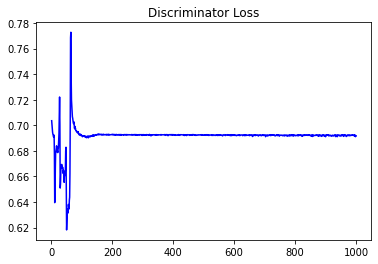

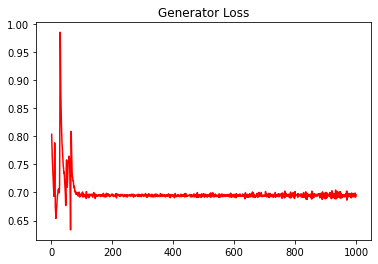

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13387701556657527


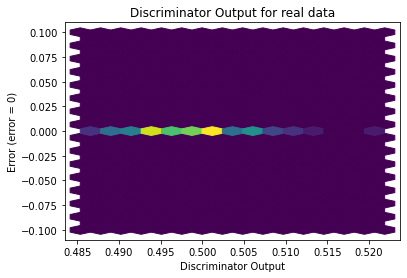

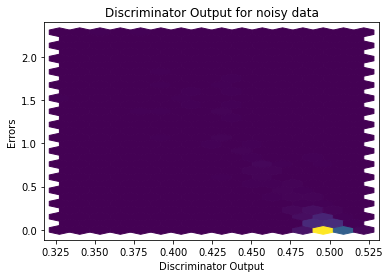

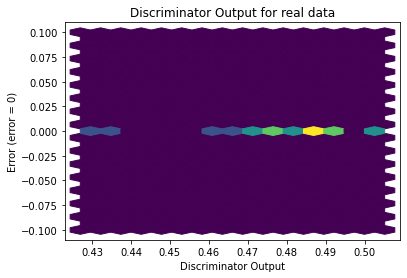

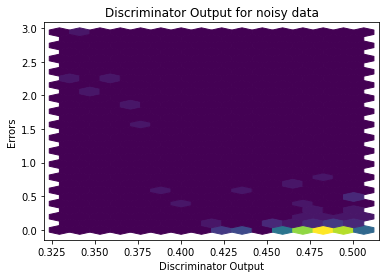

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


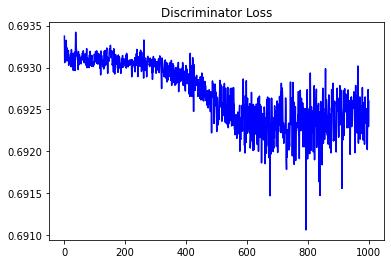

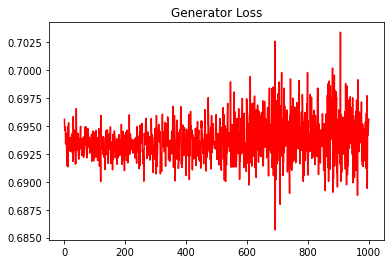

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22403738307036486


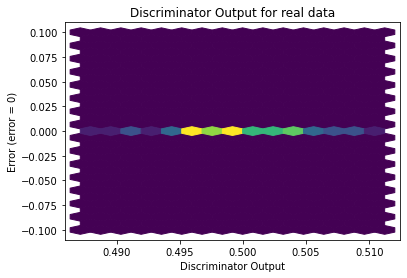

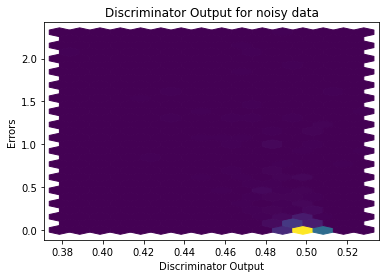

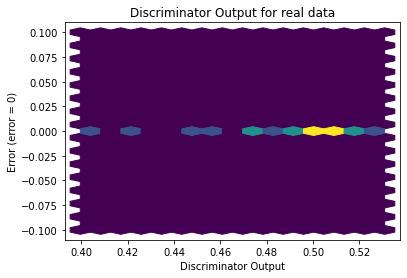

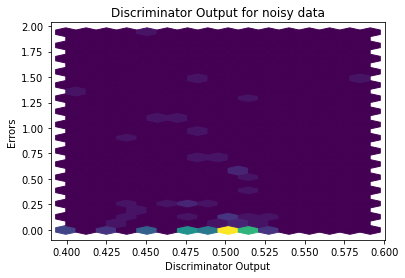

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1371]], requires_grad=True)
